# UNINDO MODELOS

In [59]:
from math import *
from cmath import *
import numpy as np
from numpy import linalg 
import matplotlib.pyplot as plt
from math import sqrt

In [66]:
def CalcularImpedanciaAntena(w, L, C):
    Z = (1j*w*L * (1/(1j*w*C)))/(1j*w*L + (1/(1j*w*C))) + 2*1j*w*L
    return Z

f = np.linspace(6e6, 12e6, 1000)

sigma = 10
wc = 7.35e6    
L = sigma/wc
C = 1/(sigma*wc)
Z = []

for i in range(len(f)):
    Z.append(CalcularImpedanciaAntena(f[i], L, C).imag) 



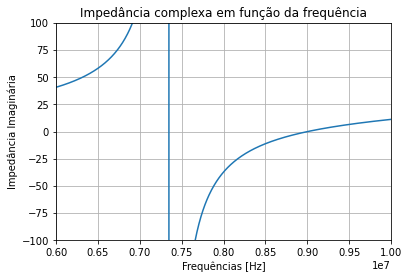

In [100]:
plt.plot(f, Z)
plt.ylim([-100,100])
plt.xlim([6e6, 10e6])
plt.title("Impedância complexa em função da frequência")
plt.xlabel("Frequências [Hz]")
plt.ylabel("Impedância Imaginária")
plt.grid()
plt.show()

In [108]:
Uf = 1

def CalcularTransformador(XM):
    Z=np.array([[1, -XM],[-XM, 1]])
    V=np.array([Uf,0])
    i=np.dot(linalg.inv(Z),V) # realiza o produto matricial
    return i[0], i[1]


XM_inicial = 1/9.5e6 
XM_final = (1/9.5e6)*1e7
lista_XM = np.linspace(XM_final, XM_inicial, 1000)

gain = []

# Calculando o ganho em função da frequência
for i in range(len(lista_XM)):
    i1, i2 = CalcularTransformador(lista_XM[i])
    gain.append(abs(i2/i1))

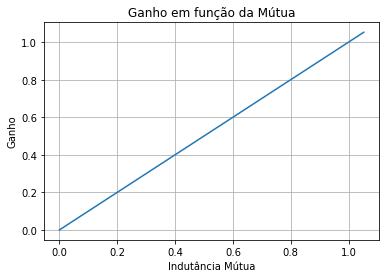

In [110]:
plt.plot(lista_XM, gain)
plt.title("Ganho em função da Mútua")
plt.xlabel("Indutância Mútua")
plt.ylabel("Ganho")
plt.grid()
plt.show()